In [10]:
import sqlite3

In [15]:
conn = sqlite3.connect("C:\\Users\\lsuarezm\\Downloads\\covid19.db")

print("C:\\Users\\lsuarezm\\Downloads\\covid19.db")

query = """
SELECT
   t.date,
   SUM(t.confirmed) AS confirmed,
   SUM(t.deaths) AS deaths,
   SUM(t.recovered) AS recovered
FROM timeseries t
WHERE t.id IN (
   SELECT l.id
   FROM location l
   WHERE l.iso_alpha_2 = "CO"
)
GROUP by t.date
ORDER by t.date ASC;
"""

import pandas as pd

df = pd.read_sql_query(query, conn)

conn.close()

print(df.head())

C:\Users\lsuarezm\Downloads\covid19.db
         date  confirmed  deaths  recovered
0  2020-03-05        NaN     NaN        NaN
1  2020-03-06        3.0     NaN        NaN
2  2020-03-07        NaN     3.0        NaN
3  2020-03-08        NaN     NaN        NaN
4  2020-03-09        7.0     NaN        NaN


In [16]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

date         datetime64[ns]
confirmed           float64
deaths              float64
recovered           float64
dtype: object


In [18]:
import matplotlib.pyplot as plt

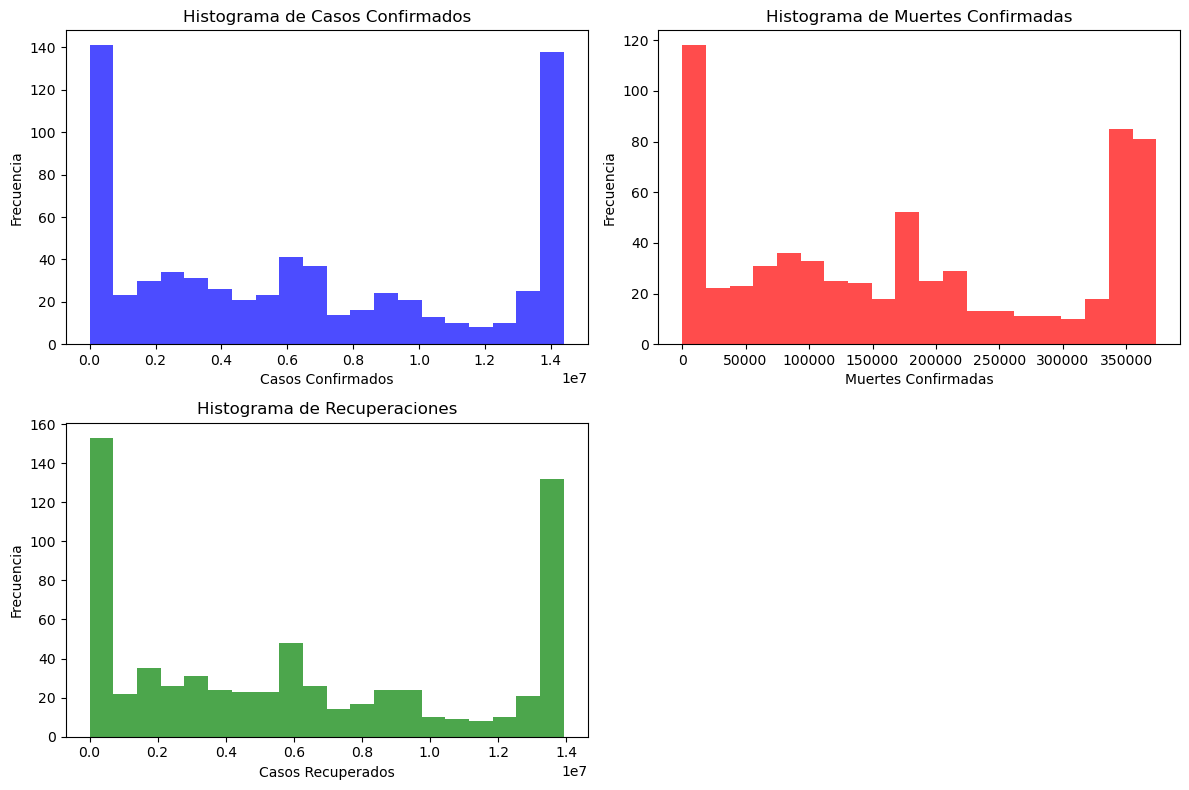

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # Posición en la cuadrícula
plt.hist(df['confirmed'], bins=20, color='blue', alpha=0.7)
plt.title("Histograma de Casos Confirmados")
plt.xlabel("Casos Confirmados")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 2)
plt.hist(df['deaths'], bins=20, color='red', alpha=0.7)
plt.title("Histograma de Muertes Confirmadas")
plt.xlabel("Muertes Confirmadas")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 3)
plt.hist(df['recovered'], bins=20, color='green', alpha=0.7)
plt.title("Histograma de Recuperaciones")
plt.xlabel("Casos Recuperados")
plt.ylabel("Frecuencia")

plt.tight_layout()  # Ajusta el diseño
plt.show()


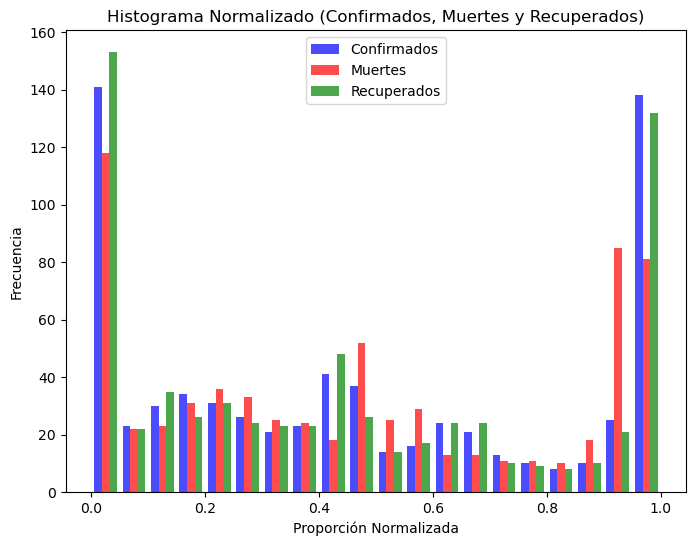

In [20]:
plt.figure(figsize=(8, 6))

plt.hist([
   df['confirmed'] / df['confirmed'].max(),
   df['deaths'] / df['deaths'].max(),
   df['recovered'] / df['recovered'].max()
], bins=20, label=['Confirmados', 'Muertes', 'Recuperados'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title("Histograma Normalizado (Confirmados, Muertes y Recuperados)")
plt.xlabel("Proporción Normalizada")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()